# Subplots

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

In [8]:
plt.figure()
plt.subplot(1,2,1)
linear= np.array([1,2,3,4,5,6,7,8,9])
plt.plot(linear, '-o')
exponential = linear**2
plt.subplot(1,2,2)
plt.plot(exponential, '-o')

<IPython.core.display.Javascript object>

In [10]:
plt.subplot(1,2,1)
plt.plot(exponential,'-x')

<ipython-input-10-096d03545ade>:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)


<IPython.core.display.Javascript object>


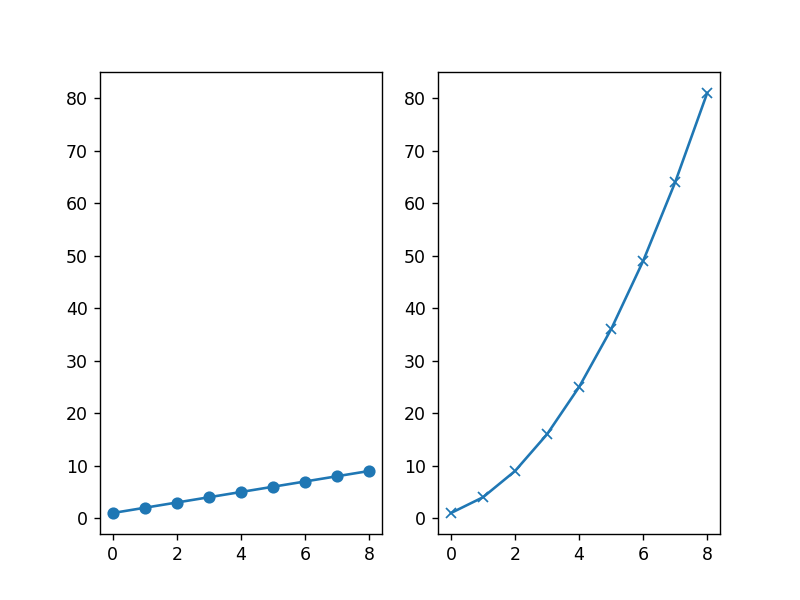

In [13]:
plt.figure()
ax1 = plt.subplot(1,2,1)
plt.plot(linear, '-o')
ax2 = plt.subplot(1,2,2, sharey=ax1)
plt.plot(exponential, '-x')

<IPython.core.display.Javascript object>


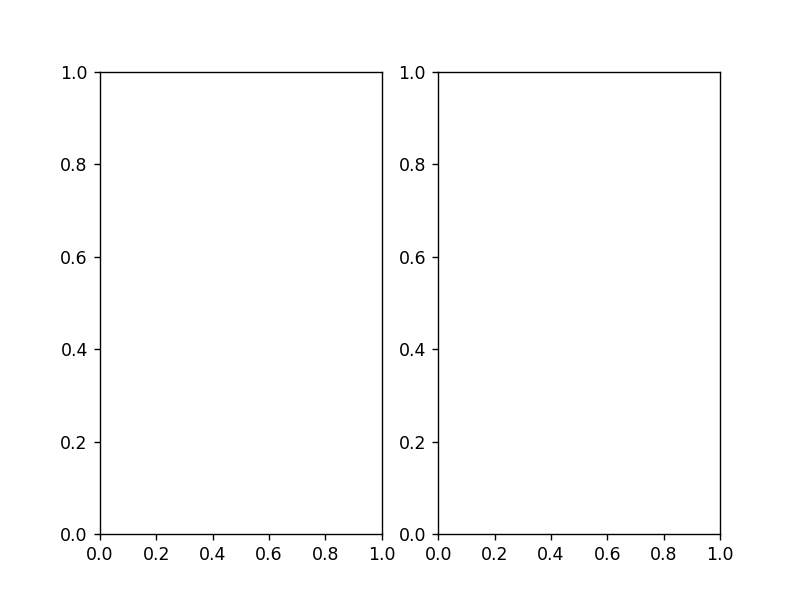

False

In [14]:
plt.figure()
plt.subplot(1,2,1) == plt.subplot(1,2,2)

<IPython.core.display.Javascript object>


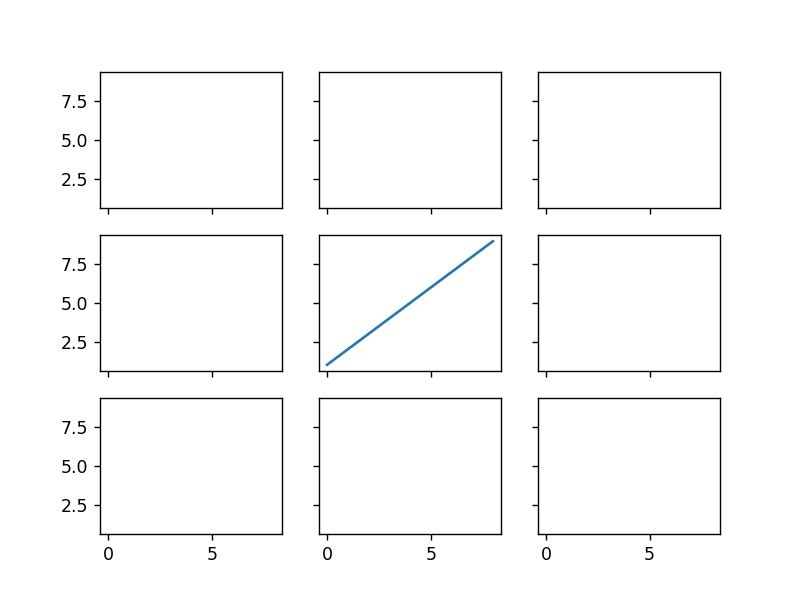

In [22]:
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9))=plt.subplots(3,3,sharex=True, sharey=True)
ax5.plot(linear, '-')

In [23]:
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels()+ ax.get_yticklabels():
        label.set_visible(True)

In [24]:
plt.gcf().canvas.draw()

# Histograms

In [27]:
fig,((ax1,ax2), (ax3, ax4)) = plt.subplots(2,2,sharex=True)
axs= [ax1,ax2,ax3,ax4]
#draw n= 10, 100,1000, and 10000 samples from the normal distribution and plot
#corresponding histograms.
for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample=np.random.normal(loc=0.0, scale=1.0,size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


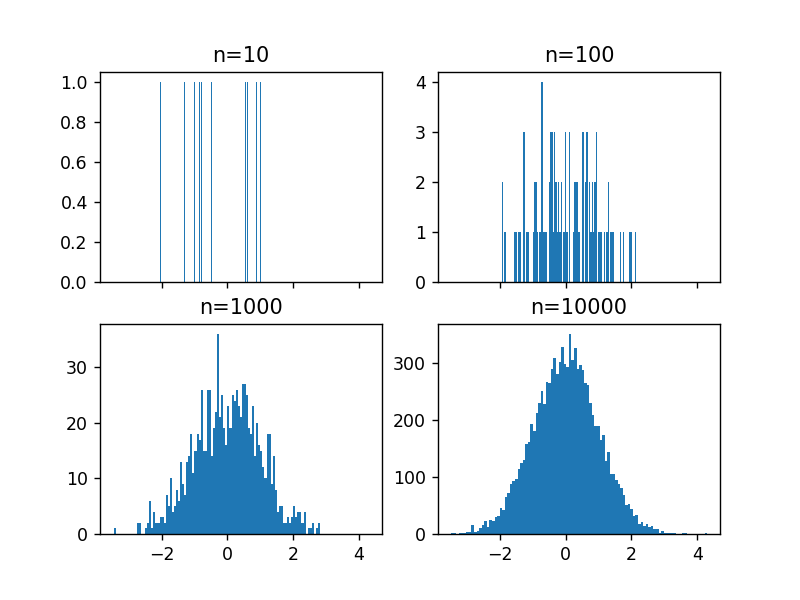

In [28]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


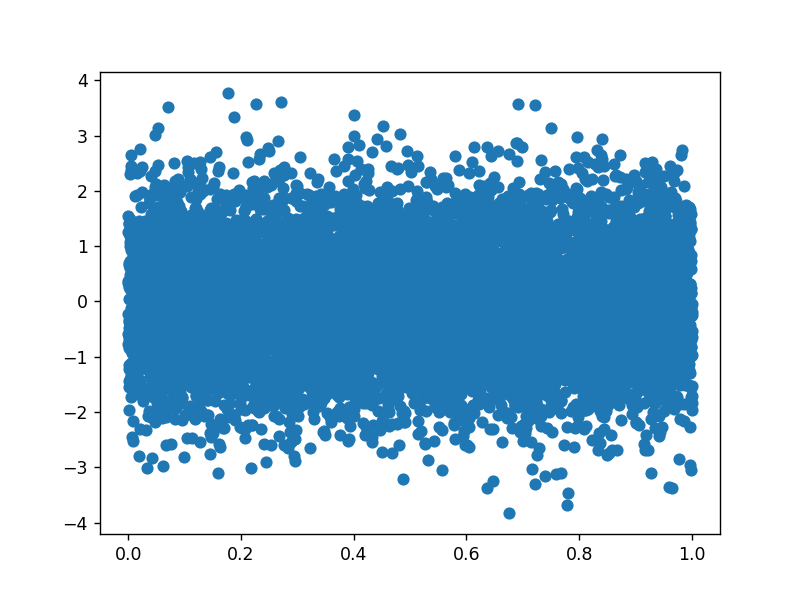

In [29]:
plt.figure()
y=np.random.normal(loc=0.0, scale=1.0, size=10000)
x=np.random.random(size=10000)
plt.scatter(x,y)

<IPython.core.display.Javascript object>


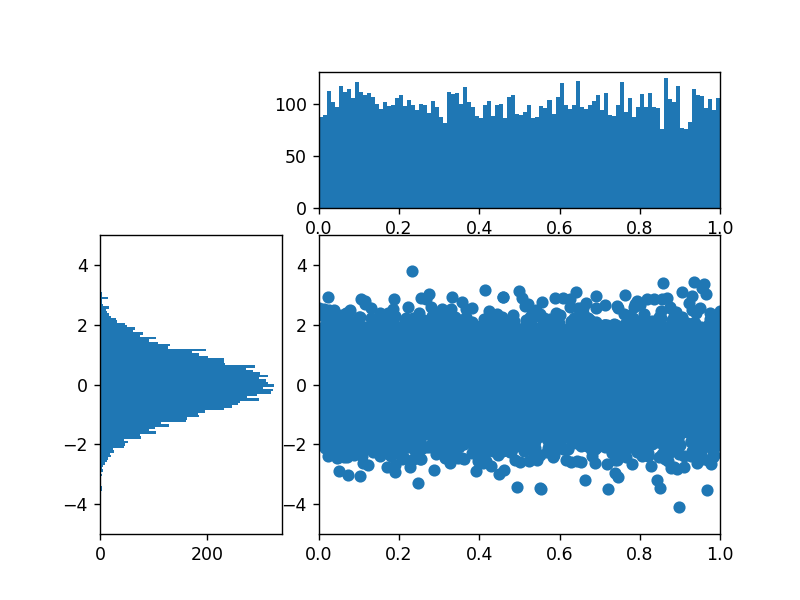

In [37]:
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3,3)

top_hist = plt.subplot(gspec[0,1:])
side_hist = plt.subplot(gspec[1:,0])
lower_right = plt.subplot(gspec[1:,1:])

In [38]:
y=np.random.normal(loc=0.0,scale=1.0,size=10000)
x=np.random.random(size=10000)
lower_right.scatter(x,y)
top_hist.hist(x,bins=100)
s=side_hist.hist(y,bins=100,orientation='horizontal')

In [42]:
top_hist.clear()
top_hist.hist(x, bins=100, normed=True)
side_hist.clear()
side_hist.hist(y, bins=100, orientation='horizontal', normed=True)
# flip the side histogram's x axis
side_hist.invert_xaxis()

AttributeError: 'Rectangle' object has no property 'normed'

In [43]:
for ax in [top_hist, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_hist, lower_right]:
    ax.set_ylim(-5, 5)

# Box and Whisker Plots

In [44]:
import pandas as pd
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})

In [45]:
df.describe()

normal        random         gamma
count  10000.000000  10000.000000  10000.000000
mean      -0.020803      0.498691      1.996677
std        1.012756      0.288707      1.393579
min       -3.510038      0.000202      0.004619
25%       -0.693939      0.253286      0.964778
50%       -0.021494      0.496539      1.687699
75%        0.656602      0.746834      2.701731
max        3.589259      0.999901     11.254462

In [48]:
plt.figure()
# create a boxplot of the normal data, assign the output to a variable to supress output
x= plt.boxplot(df['normal'], whis='range')

<IPython.core.display.Javascript object>

<ipython-input-48-c5f959eae4dd>:3: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  x= plt.boxplot(df['normal'], whis='range')


In [49]:
plt.clf()
# plot boxplots for all three of df's columns
x= plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')

<ipython-input-49-a619f8b3fbd7>:3: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  x= plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')


<IPython.core.display.Javascript object>


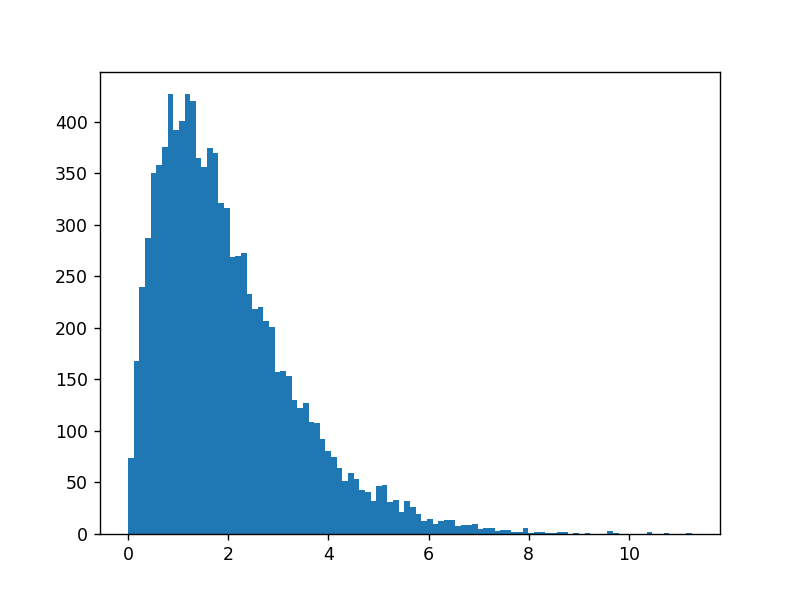

In [51]:
plt.figure()
x=plt.hist(df['gamma'], bins=100)

<IPython.core.display.Javascript object>


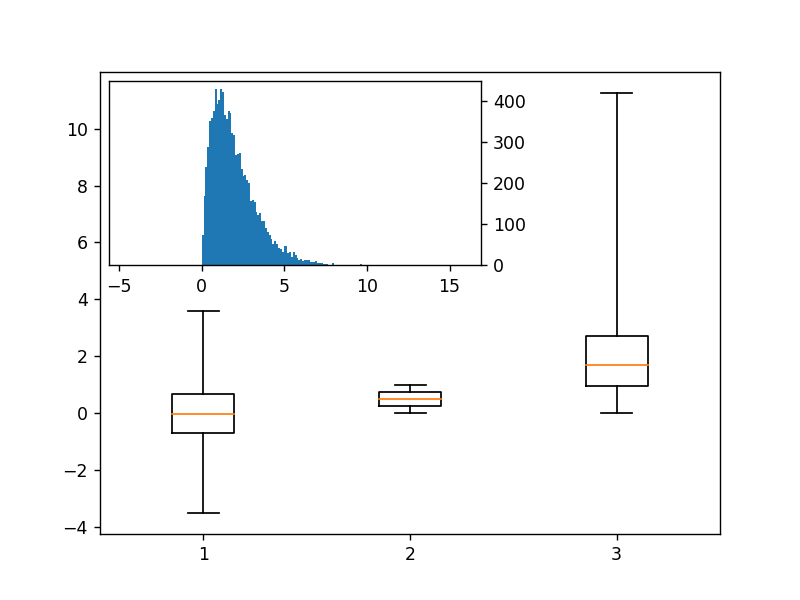

<ipython-input-52-4eed465a3a43>:4: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')


In [52]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')
# overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

In [53]:
# switch the y axis ticks for ax2 to the right side
ax2.yaxis.tick_right()

<IPython.core.display.Javascript object>


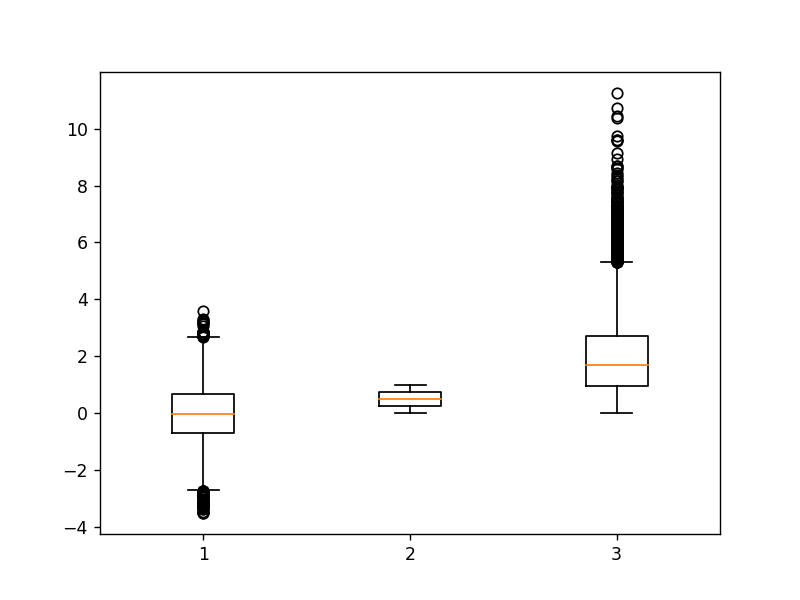

In [54]:
# if `whis` argument isn't passed, boxplot defaults to showing 1.5*interquartile (IQR) whiskers with outliers
plt.figure()
x = plt.boxplot([ df['normal'], df['random'], df['gamma'] ] )

# Heatmaps

<IPython.core.display.Javascript object>


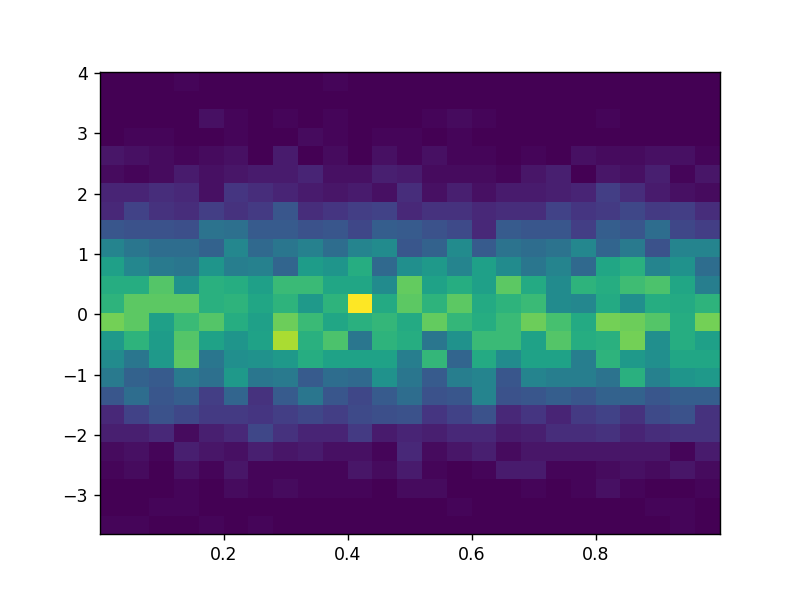

In [60]:
plt.figure()

x = np.random.normal(loc=0.0, scale=1.0, size=10000)
y = np.random.random(size=10000)
z = plt.hist2d(X, Y, bins=25)

<IPython.core.display.Javascript object>


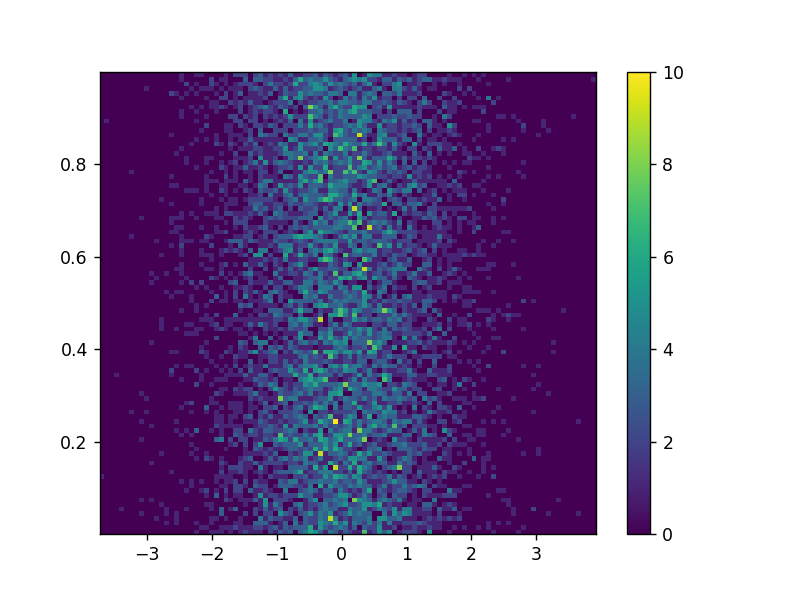

In [61]:
plt.figure()
z = plt.hist2d(x, y, bins=100)

In [62]:
plt.colorbar()

# Animations

In [64]:
import matplotlib.animation as animation

n=100
x=np.random.randn(n)

In [65]:
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])

<IPython.core.display.Javascript object>


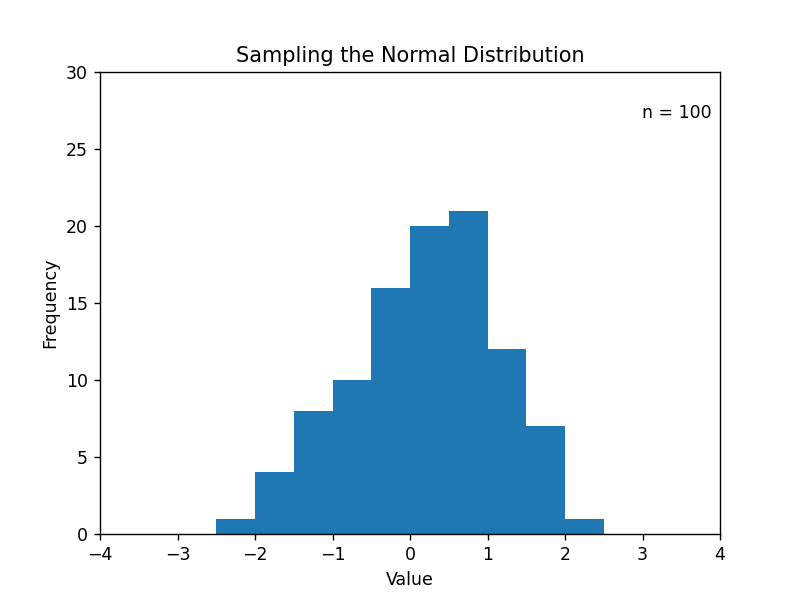

In [66]:
fig = plt.figure()
a= animation.FuncAnimation(fig, update, interval=100)

# Interactivity

<IPython.core.display.Javascript object>


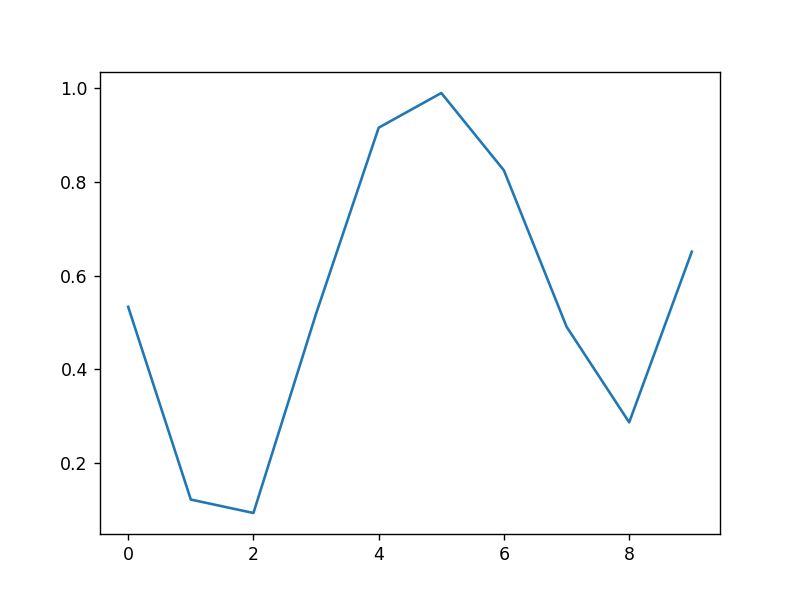

9

In [67]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [68]:
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
df

height    weight   origin
0  0.934405  0.960115       UK
1  0.702454  0.980159   Brazil
2  0.331089  0.777717  Germany
3  0.687593  0.652086    China
4  0.505671  0.777138    India
5  0.586825  0.635268   Mexico
6  0.093665  0.244539      USA
7  0.643055  0.084871     Iraq
8  0.255715  0.621609    Chile
9  0.822605  0.321063   Canada

<IPython.core.display.Javascript object>


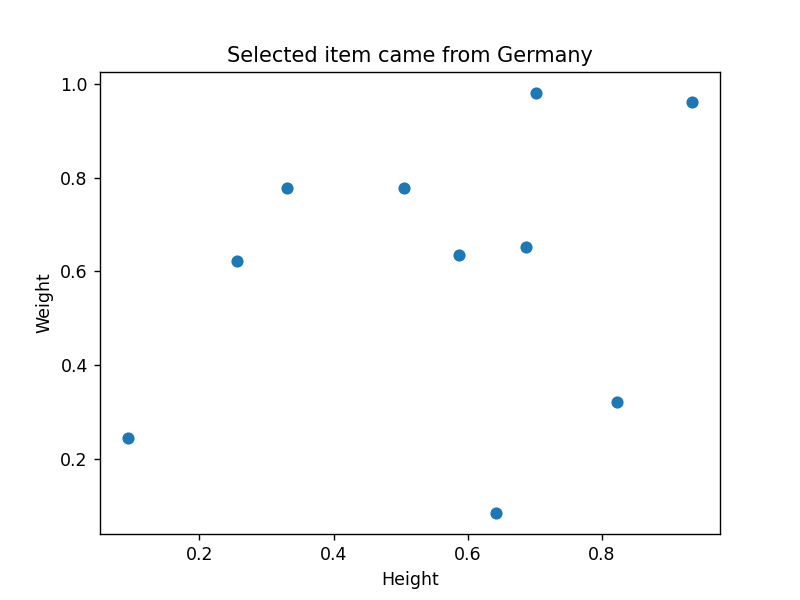

Text(0.5, 0, 'Height')

In [69]:
plt.figure()
# picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

In [70]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)

9